In [1]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)

In [2]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [14]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [15]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [21]:
print(X_train.dtypes)


pregnant    object
insulin     object
bmi         object
age         object
glucose     object
bp          object
pedigree    object
dtype: object


In [22]:
# Convert all columns to numeric, invalid parsing will result in NaN
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Check if there are any NaN values after conversion
print(X_train.isnull().sum())


pregnant    1
insulin     1
bmi         1
age         1
glucose     1
bp          1
pedigree    1
dtype: int64


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
import numpy as np

# Check for NaNs in the scaled data
print(np.isnan(X_train_scaled).sum())  # This should print 0 if there are no NaNs
print(np.isnan(X_test_scaled).sum())   # This should print 0 if there are no NaNs


7
0


In [26]:
# Check original X_train and X_test for missing values
print(X_train.isnull().sum())
print(X_test.isnull().sum())


pregnant    1
insulin     1
bmi         1
age         1
glucose     1
bp          1
pedigree    1
dtype: int64
pregnant    0
insulin     0
bmi         0
age         0
glucose     0
bp          0
pedigree    0
dtype: int64


In [27]:
# Fill NaN values with the mean
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


In [28]:
# Re-scale the data after filling missing values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[112,  19],
       [ 19,  43]])

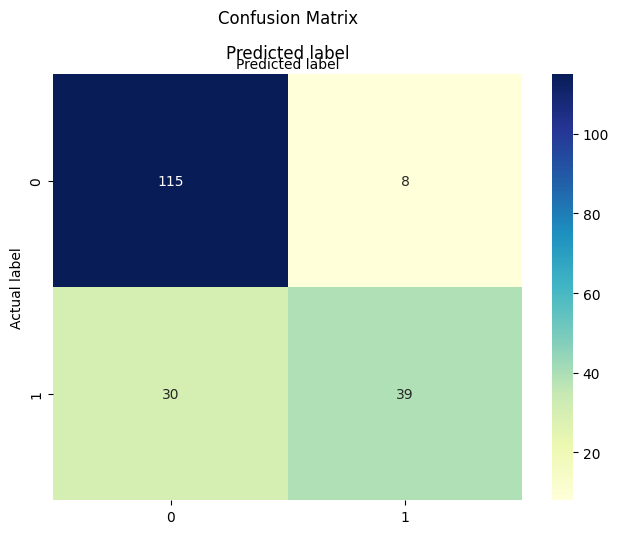

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas to handle DataFrame

# Assuming `cnf_matrix` is already defined, for example:
cnf_matrix = np.array([[115, 8], [30, 39]])

class_names = [0, 1]  # names of classes

# Create a plot with a heatmap
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g', ax=ax)

# Label position customization
ax.xaxis.set_label_position("top")

# Title and labels
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Add custom text (fix the previous error)
ax.text(0.5, 1.05, 'Predicted label', ha='center', va='center', fontsize=12, transform=ax.transAxes)

# Show plot
plt.show()


In [38]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.85      0.85      0.85       131
   with diabetes       0.69      0.69      0.69        62

        accuracy                           0.80       193
       macro avg       0.77      0.77      0.77       193
    weighted avg       0.80      0.80      0.80       193



In [44]:
print(f"y_test shape: {y_test.shape}")
print(f"y_pred_proba shape: {y_pred_proba.shape}")


y_test shape: (193,)
y_pred_proba shape: (193,)


In [45]:
print(f"Unique values in y_test: {np.unique(y_test)}")


Unique values in y_test: ['0' '1']


In [46]:
y_test = y_test.astype(int)


C:\Users\samik\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


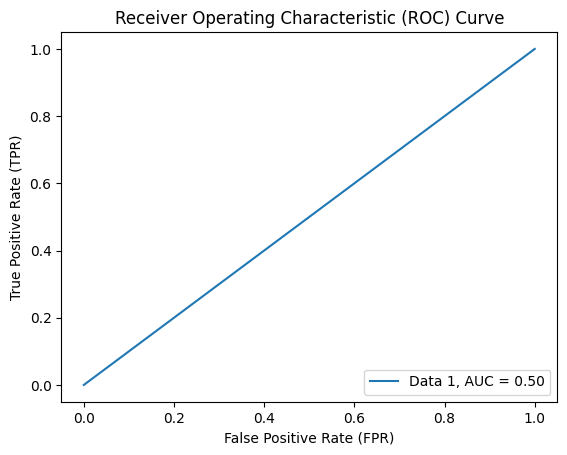

In [48]:
# Ensure y_test is in numeric format (int)
y_test = y_test.astype(int)

# Get predicted probabilities for class 1 (positive class)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label="Data 1, AUC = {:.2f}".format(auc))  # Format AUC for label
plt.legend(loc=4)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()
